In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Dtree has less accuracy but less time
#KNN has more accuracy but takes more time
ds = pd.read_csv('../../data/titatinc/train.csv')
# dt=pd.read_csv('../../data/titatinc/)
ds.info()
# sub=pd.read_csv('../../data/')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [3]:
ds.head()
#SibSp-number of siblings and spouse
#Parch-number of parents or children
#cabin first alphabt represents a class and unless we know the ship structure we cannot use it also this has max non number values
print ds.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25  

In [4]:
#remove the waste parameters
cols_to_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked',
]
#new data frame in df
df = ds.drop(cols_to_drop, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500


In [5]:
#all are numeric except for sex
def convert_sex_to_num(s):
    if s=='male':
        return 0
    elif s=='female':
        return 1
    else:
        return s
#mapping function-coloumn mapping
#df.Sex = df.Sex.map(convert_sex_to_num)
#or df[Sex] = map(convert_sex_to_num(df[Sex])) #not correct find the correct sol
li=[0,1]
df.Sex=map(convert_sex_to_num,df.Sex)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22,1,0,7.2500
1,1,1,1,38,1,0,71.2833
2,1,3,1,26,0,0,7.9250
3,1,1,1,35,1,0,53.1000
4,0,3,0,35,0,0,8.0500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 55.7 KB


In [7]:
data = df.dropna() #drops the the rows with NAN
data.describe() #TO-DO read what is quartile percentile
#surived is the target class

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


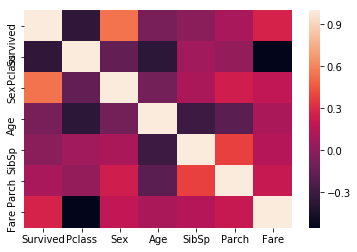

In [8]:
plt.figure()
sns.heatmap(data.corr())
#how much change in a perticular coloumn is dependent of another coloumn
#diagonal are relation of one col  with itself there for 1

In [9]:
#adding the data to the decision tree
#oot node is useually the most imp col
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
out_cols = ['Survived']

X = data[input_cols]
y = data[out_cols]

#X.head()
print X.shape, y.shape

(714, 6) (714, 1)


In [10]:
#when you drop some the indexs remains same therefore we reindex them
#df.loc[3] loc is for location and 3 is the row number \, from this we get this particular row 
data = data.reset_index(drop=True)

# Functions for Decision Tree

In [11]:
#method to divide the data
#1st-dataset
#2nd-feature
#3rd value of the feature on which it has to be divided
#TODO read about pd.DataFrame
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], columns=x_data.columns) 
    x_left = pd.DataFrame([], columns=x_data.columns)
    
    
    for ix in range(x_data.shape[0]): #for evry row
        # Retrieve the current value for the fkey column
        val = x_data[fkey].loc[ix]
        
        # Check where the row needs to go
        if val > fval:
            # pass the row to right
            x_right = x_right.append(x_data.loc[ix])
        else:
            # pass the row to left
            x_left = x_left.append(x_data.loc[ix])
    
    # return the divided datasets
    return x_left, x_right


def entropy(col):
    counts = np.unique(col, return_counts=True)
    N=float(col.shape[0])
    ent=0.0
    for ix in range(counts[0].shape[0]): #for every unique value
        frac=counts[1][ix]/N
        ent+=(-1.0*frac*np.log2(frac))
    return ent
 
#sometimes the most correlatd feature is not the best option to split
def information_gain(xdata, fkey, fval):
    left, right = divide_data(xdata, fkey, fval)
    P=left.shape[0]/float(xdata.shape[0])
    Q=right.shape[0]/float(xdata.shape[0])
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000 #very large ingo gain is return so that this case never gets accepted
    #print left.survived
    return entropy(xdata.Survived) - (P*entropy(left.Survived) + Q*entropy(right.Survived))

In [12]:
for fx in X.columns:
    print fx,
    print information_gain(data, fx, data[fx].mean())

Pclass 0.0841581440715109
Sex 0.21601606075154256
Age 2.6666107433293007e-08
SibSp 0.006904127996153919
Parch 0.019278172321014586
Fare 0.05371958996365245


In [13]:
# The DT class

In [14]:
class DecisionTree:
    def __init__(self, depth=0, max_depth=5): #prop of each node of the tree
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None #helpfull at the leaf node and while pruning
    #its complexity is O(noOfRows*Col*2^Max_depth)
    #kNN has 0 training time
    def train(self, X_train):
        print self.depth, '-'*10
        # Get the best possible feature and division value
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        gains = [] #or IG
        for fx in features:
            gains.append(information_gain(X_train, fx, X_train[fx].mean()))
        
        # store the best feature (using min information gain)
        self.fkey = features[np.argmax(gains)]
        self.fval = X_train[self.fkey].mean()
        
        # divide the dataset
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        # Check the shapes
        #if the data can be further divided or not
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
        #if the max depth is reached
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
      #recursive calls for each child node  
        # branch to right
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)
        # branch to left
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = 'Survived'
        else:
            self.target = 'Dead'
        return
    #predict function of the decision tree
    #it's complexity is O(Max_depth)
    #knn has O(m*n) hence DTree is better
    def predict(self, test):
        if test[self.fkey] > self.fval:
            # go right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            # go left
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [16]:
split = int(0.8 * data.shape[0])

training_data = data[:split]
testing_data = data[split:]


In [17]:
dt = DecisionTree()
dt.train(training_data)

0 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------


In [18]:
print testing_data.shape



(143, 7)


In [19]:
# print dt.fkey, dt.fval
# print dt.right.fkey, dt.right.fval
# print dt.left.fkey, dt.left.fval

# print dt.right.right.fkey, dt.right.right.fval
# print dt.right.left.fkey, dt.right.left.fval


# print dt.left.right.fkey, dt.left.right.fval
# print dt.left.left.fkey, dt.left.left.fval


In [20]:
# print testing_data.loc[ix]["Survived"]==0

In [21]:
def score():
    
    count=0
    for ix in testing_data.index[:testing_data.shape[0]]:
        if dt.predict(testing_data.loc[ix]) == "Dead" and testing_data.loc[ix]["Survived"] == 0:
            count+=1
                                                                           
# print count
# print testing_data.shape[0]

    return 1.0*count/testing_data.shape[0]

In [22]:
# testing_data.head(10)
score()

0.5174825174825175

In [38]:
dtt=pd.read_csv('../../data/titatinc/test.csv')

#new data frame in df
dtt = dtt.drop(cols_to_drop, axis=1)

dtt.Sex=map(convert_sex_to_num,dtt.Sex)

# dtt = dtt.dropna()
dtt = dtt.reset_index(drop=True)
dtt.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [40]:
for ix in range(dtt.shape[0]):
    if dt.predict(dtt.loc[ix])=="Dead":
        print 0
    else:
        print 1

# dtt.shape[0]

0
0
0
0
1
0
1
0
1
0
0
0
1
0
1
1
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
0
1
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
1
0
0
0
1
0
1
1
0
1
1
1
0
1
0
1
1
0
1
0
1
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
1
1
1
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
1
1
0
1
1
0
1
1
0
1
0
1
0
0
0
0
0
1
0
0
0
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
1
1
1
1
0
0
1
0
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
0
1
1
1
1
0
0
1
0
1
0
0
1
0
1
1
0
0
0
0
1
1
1
1
1
0
1
0
0
1


In [41]:
import sklearn

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
DT = DecisionTreeClassifier()
DT.fit(X[:split], y[:split])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
DT.score(X[split:], y[split:])

0.7832167832167832

In [45]:
#for practical use Random Forset is much more efficient
rf = RandomForestClassifier(n_estimators=100) #default has gini but if you add ,criterion='entropy' the accuracy increases
rf.fit(X[:split], y[:split])

rf.score(X[split:], y[split:]) #accuracy

/home/shubhijain/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8461538461538461

In [46]:
for i in DT.predict(dtt):
    print i

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').